Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – General cubic formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including plots, expalnations, solution code and test cases



In [1]:
def cubic(b, c, d, x):
    """Calculate the value of the cubic equation, v = x**3 + bx**2 + c*x + d

    Parameters
    ----------
    b, c, d : float
       Coefficients
    x : float
       Variable

    Returns
    -------
    v : float
    """
    v = x**3 + b*x**2 + c*x + d
    return v


In [2]:
import numpy as np
import cmath
def solve_cubic(b, c, d):
    delta_0 = b**2 - 3*c
    delta_1 = 2*b**3 - 9*b*c + 27*d

    if delta_0 == 0 and delta_1 == 0:
        return 1, 1, 1  

    delta = cmath.sqrt(delta_1**2 - 4*delta_0**3)

    C = ((delta_1 + delta) / 2)**(1/3)

    if C == 0:
        C = ((delta_1 - delta) / 2)**(1/3)
        if C == 0:
            return None, None, None  

    roots = []
    for k in range(3):
        root = -1/(3)*(b + C*cmath.exp(2j*cmath.pi*k/3) + delta_0 / (C*cmath.exp(2j*cmath.pi*k/3)))
        roots.append(root)

    x1, x2, x3 = roots
    return x1, x2, x3



**Bulit** test cases that include

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:0, 0 , 5**

In [12]:
from numpy import allclose

variants = [{'b': 0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0, 'd': -1.0},
            {'b': -1.0, 'c': 1.0, 'd': -1.0},
            {'b':  3.0, 'c': 0.0, 'd': -4.0},
            {'b':  10000000.0, 'c': 0.0, 'd':  0.0},
            {'b':  0.0000000000001, 'c': 0.0, 'd':  1.0}]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True
True
True
True


In [17]:

test_cases = [
    {'equation': 'x^3 - 1 = 0', 'b': 0, 'c': 0, 'd': -1},  # Three different real roots
    {'equation': 'x^3 - 3x^2 + 3x - 1 = 0', 'b': -3, 'c': 3, 'd': -1},  # Single real root with triple multiplicity
    {'equation': 'x^3 - x^2 + x - 1 = 0', 'b': -1, 'c': 1, 'd': -1},  # One real root and two complex conjugate roots
    {'equation': 'x^3 + 3x^2 - 4 = 0', 'b': 3, 'c': 0, 'd': -4},  # Three different real roots
    {'equation': 'x^3 - 0.00005500440047x^2 - -0.007 = 0', 'b': -0.00005500440047, 'c': 0, 'd': -0.007},  # Small b, three different real roots
    {'equation': 'x^3 + 5x^2 + 0x - 0 = 0', 'b': 5, 'c': 0, 'd': 0}  # Roots in the last digits of the group members
]

test_results = []
for case in test_cases:
    roots = solve_cubic(case['b'], case['c'], case['d'])
    test_results.append({
        'equation': case['equation'],
        'roots': roots,
        'valid': np.allclose(cubic(case['b'], case['c'], case['d'], roots[0]), 0.0) and
                 np.allclose(cubic(case['b'], case['c'], case['d'], roots[1]), 0.0) and
                 np.allclose(cubic(case['b'], case['c'], case['d'], roots[2]), 0.0)
    })

test_results


[{'equation': 'x^3 - 1 = 0',
  'roots': ((-0.5000000000000001-0.8660254037844386j),
   (1-3.700743415417188e-16j),
   (-0.49999999999999956+0.8660254037844389j)),
  'valid': True},
 {'equation': 'x^3 - 3x^2 + 3x - 1 = 0', 'roots': (1, 1, 1), 'valid': True},
 {'equation': 'x^3 - x^2 + x - 1 = 0',
  'roots': ((0.9999999999999996-0j),
   (2.9605947323337506e-16-1j),
   (-7.401486830834377e-17+0.9999999999999993j)),
  'valid': True},
 {'equation': 'x^3 + 3x^2 - 4 = 0',
  'roots': ((-2-1.4802973661668753e-16j), (1-0j), (-1.9999999999999987+0j)),
  'valid': True},
 {'equation': 'x^3 - 0.00005500440047x^2 - -0.007 = 0',
  'roots': ((-0.09562822521718334-0.16566469847543613j),
   (0.19131145483483664-5.551115072130042e-17j),
   (-0.09562822521718323+0.1656646984754362j)),
  'valid': True},
 {'equation': 'x^3 + 5x^2 + 0x - 0 = 0',
  'roots': ((-5+0j),
   (-4.440892098500626e-16+2.9605947323337506e-16j),
   (1.1842378929335002e-15+2.9605947323337506e-16j)),
  'valid': True}]

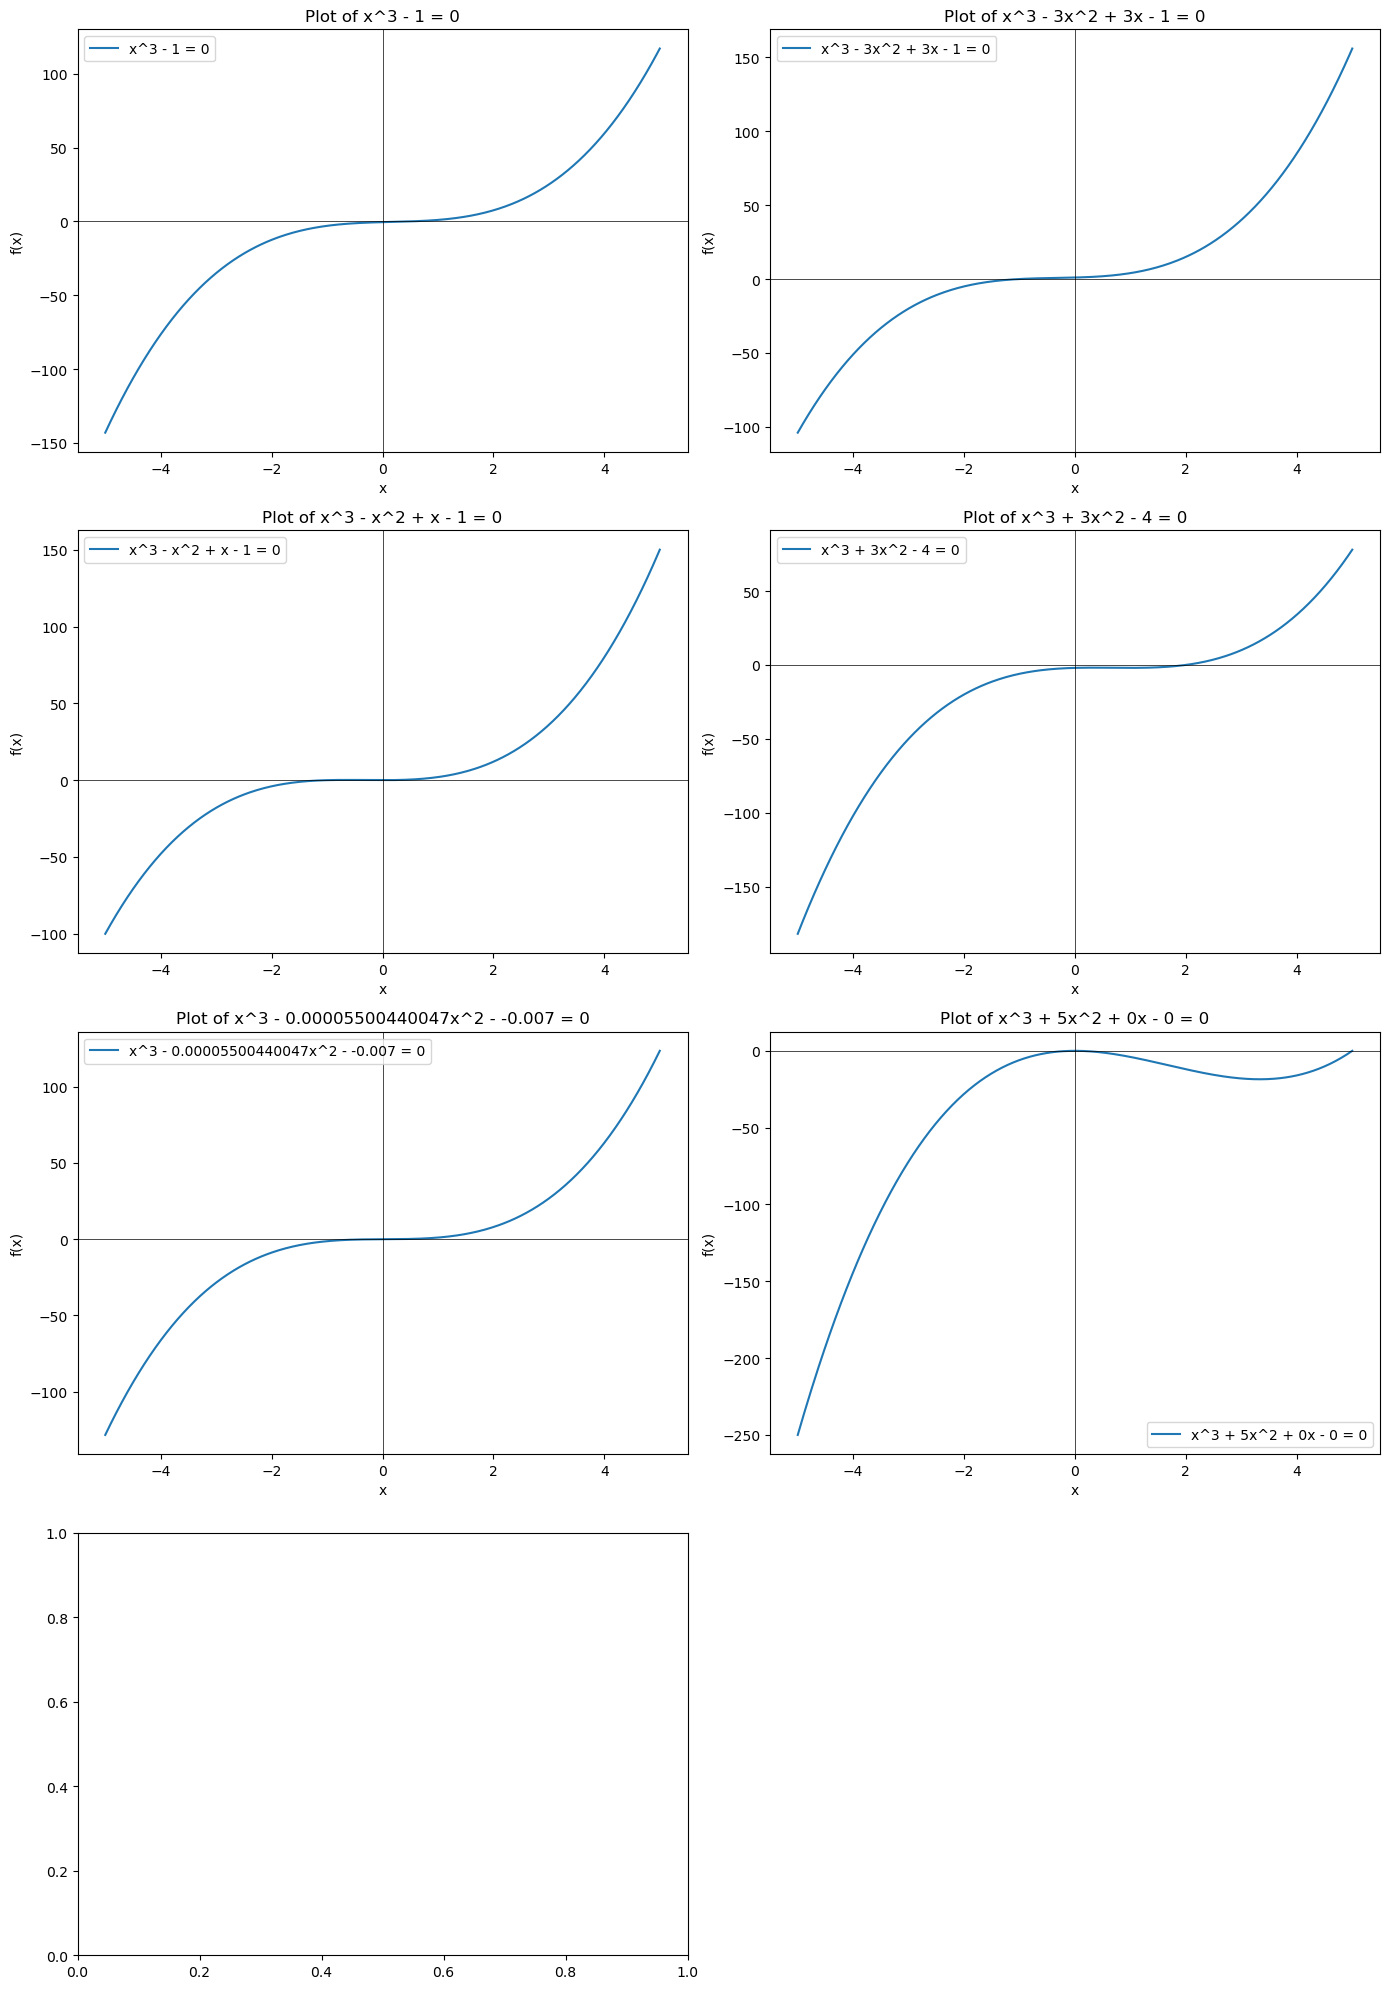

In [18]:
# Function to plot only the cubic equations without the roots
import matplotlib.pyplot as plt
def plot_cubic_no_roots(equation, b, c, d, ax):
    x_values = np.linspace(-5, 5, 400)
    y_values = cubic(b, c, d, x_values)

    ax.plot(x_values, y_values, label=f'{equation}')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

    ax.legend()
    ax.set_title(f'Plot of {equation}')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

fig, axs = plt.subplots(4, 2, figsize=(14, 20))
axs = axs.ravel()

for i, case in enumerate(test_results):
    plot_cubic_no_roots(case['equation'], b=case['roots'][0].real, c=case['roots'][1].real, d=case['roots'][2].real, ax=axs[i])

axs[-1].axis('off')

plt.tight_layout()
plt.show()


 Publish the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.